## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 7
---------------------------------------

GOALS:

1. Answer all the questions from the lecture - we will use the scientists data and the grocery data.
2. Analyze data about College majors - your first EDA! (Think of this as a practice exam.)

----------------------------------------------------------

This homework has **9 Questions** and **A Practice Exam**

NOTE:
The practice exam is intended to give you an idea of what an exam in this class might feel like. Remember you will be expected to work on the exam **independently** and submit your work before we get together to work on the exam in class. **15\% of your Exam grade will come from what you can do independently** so start practicing now and get help if you need it!.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Lecture Questions

First we will import the data about female scientists.

In [4]:
file1 = 'https://joannabieri.com/introdatascience/data/dates.csv'
DF_dates = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/professions.csv'
DF_professions = pd.read_csv(file2)
file3 = 'https://joannabieri.com/introdatascience/data/works.csv'
DF_works = pd.read_csv(file3)
show(DF_dates)
show(DF_professions)
show(DF_works)

**Q1** Are each of these data sets Tidy?

**Q2** Do they all contain the same number of observations?

**Q3** What are the five variables?

**Q4** What variable do they have in common - what can we join **on**

**(Click Here)**
I would say the data is pretty tidy since we now have 2 or 3 columns to work with. It doesn't seem to be a big data set with lots of data.
They all have different observations from 8 to 10 to 9 observations per data set.
Name, birth year, death year, profession, and known for.
We can merge them through their names

## Combining Three Data Sets

You need to think about the order and whether or not you want to keep the maximum number of names or only keep names that are in all the data frames.

In this case we will try to keep the maximal amount of data - the maximum number of names.

1. Combine the professions and works data
2. Then add the dates data

In [79]:


# 1. Combine the professions and works data
DF_scientists = pd.merge(DF_professions,DF_works,on='name',how='right')
DF_scientists
# 2. Then add the dates data
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='right')
DF_scientists

,name,profession,known_for,birth_year,death_year
0,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897,1984.0
1,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912,1997.0
2,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918,2020.0
3,Rosalind Franklin,NaN,NaN,1920,1958.0
4,Vera Rubin,Astronomer,existence of dark matter,1928,2016.0
5,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930,NaN
6,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947,NaN
7,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964,NaN


**Q5** What, if anything, would change if you switched to how='right'?

There would be less names going from 9 to 7. Keeping the ones it found it had in common and the ones it didn't from the right hand side of the data.

## Combining Two Data Sets - You Try

**Q6** Write code that would combine the professions data and the dates data, but drop any names that don't appear in both.

In [85]:
# Your code here

pd.merge(DF_professions,DF_dates, on='name',how='inner')


,name,profession,birth_year,death_year
0,Janaki Ammal,Botanist,1897,1984.0
1,Chien-Shiung Wu,Physicist,1912,1997.0
2,Katherine Johnson,Mathematician,1918,2020.0
3,Rosalind Franklin,Chemist,1920,1958.0
4,Vera Rubin,Astronomer,1928,2016.0
5,Gladys West,Mathematician,1930,NaN
6,Flossie Wong-Staal,Virologist and Molecular Biologist,1947,NaN
7,Jennifer Doudna,Biochemist,1964,NaN


## Combining Three Data Sets - You Try

**Q7** Try to combine the three data sets together (professions, works, and dates) but instead of doing what we did above, see if you can keep only the names that appeared in all three data sets.

In [117]:
# Your code here
DF_scientists = pd.merge(DF_professions,DF_works,on='name',how='right')#This will merege it all to names with keeping DF_works as priority
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='right',indicator=True) #This will make sure names that didn't appear on the first shift make them appear now
mask = DF_scientists['_merge']=='both'#this will make a columns where it will say if the person appears on both side of the data set
DF_scientists=DF_scientists[mask]
DF_scientists

,name,profession,known_for,birth_year,death_year,_merge
0,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897,1984.0,both
1,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912,1997.0,both
2,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918,2020.0,both
4,Vera Rubin,Astronomer,existence of dark matter,1928,2016.0,both
5,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930,NaN,both
6,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947,NaN,both
7,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964,NaN,both


## Case study - Grocery Sales

Below you will load some data about grocery sales and see how joining or merging data can help us answer questions.

In [16]:
file1 = 'https://joannabieri.com/introdatascience/data/purchases.csv'
DF_purchases = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/prices.csv'
DF_prices = pd.read_csv(file2)
show(DF_purchases)
show(DF_prices)

## Calculate the total revenue

**Q8** Given the data above find the total revenue.

We will have to join the data frames so that we can see the price of what was sold. So first we look for a common column. In this case both data frames have **item** as a column.

Now, think about how to calculate revenue... we need to add up the total money we made, so we need to know the price of each thing sold.

**PAUSE - see if you can write some of the code for this before looking at the cells below**

In [199]:
#DF_purchase = pd.merge(DF_prices, DF_purchases, on='item',how='outer')
#DF_purchase

In [203]:
DF_combined = pd.merge(DF_prices,DF_purchases,on='item',how='right')
DF_combined


,item,price,customer_id
0,bread,1.00,1
1,milk,0.80,1
2,banana,0.15,1
3,milk,0.80,2
4,toilet paper,3.00,2


In [20]:
#

In [21]:
#

**See the lecture notes if you need heelp figuring this out!**

**Q9** Calculate the revenue per customer? Hint - group by the customer id and then apply the sum().

In [201]:
# Your code here
DF_combined = pd.merge(DF_prices,DF_purchases,on='item',how='right')
DF_combined
DF_combined['price'].sum()

5.75

# Practice Exam - EDA - College Majors

Your solutions should include code written to answer the questions AND words describing the results. For each problem:

1. Write code to get the answers. It is okay to copy and paste from our lecture notes or your homework assignments.
2. Describe what the code output is telling you.
3. Explain any interesting aspects of your results.

------------------------
-------------------------

The first step in the process of turning information into knowledge process is to summarize and describe the raw information - the data.
In this assignment we explore data on college majors and earnings, specifically the data begin the FiveThirtyEight story ["The Economic Guide To Picking A College Major"](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/).

These data originally come from the American Community Survey (ACS) 2010-2012 Public Use Microdata Series.
While this is outside the scope of this assignment, if you are curious about how raw data from the ACS were cleaned and prepared, see [the code](https://github.com/fivethirtyeight/data/blob/master/college-majors/college-majors-rscript.R) FiveThirtyEight authors used.

We should also note that there are many considerations that go into picking a major.
Earnings potential and employment prospects are two of them, and they are important, but they don't tell the whole story.
Keep this in mind as you analyze the data.

In [26]:
file_location = 'https://joannabieri.com/introdatascience/data/recent-grads.csv'
DF_raw = pd.read_csv(file_location)

In [27]:
DF_raw

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


### 1. Describe the data that you see here.

* How many variables?
* How man observations?
* Are the variables categorical or numerical?
* Are there any variables that you don't know what they mean? If so [CLICK HERE - to see the Git Repo for the data where the variables are defined](https://github.com/fivethirtyeight/data/tree/master/college-majors)


In [137]:
#There are 21 variables starting Rank to low-wage jobs

#print(DF_raw) 
#I commented on the code cause it was taking up a lot of screen space by giving the dimensions of the data

In [129]:
# We have 173 observations


In [31]:
#It is mainly numerical but we have 2 categorial sets of data as well.

**(Click Here to Explain your Results)**

### 2. Answer some questions about the data

* Which major has the lowest unemployment rate? Show a data frame that answers this question, but only show columns that are useful to the answer.
* Which major has the highest percentage of women? Show a data frame that answers this question, but only show columns that are useful to the answer.
* How do the distributions of median income compare across major categories?
    * First get a value count on what major categories are in the data. What categories are most or least represented?
    * Do some summary statistics using the .group_by() command to see the statistics for each major category.
    * Make a histogram that explores median income for each of the major categories (facet_col). How did you choose your number of bins?
    * Why do we often choose the median, rather than the mean, to describe the typical income of a group of people? Look this up online if you don't know the answer!
    * Answer the question: Which major category has the highest typical (you'll need to decide what this means) median income?

In [161]:
my_variables = ['Major', 'Unemployment_rate']

DF = DF_raw[my_variables]
DF_sorted = DF[my_variables].sort_values('Unemployment_rate', ascending=True)
show(DF_sorted)
#The first line of code gives us the 2 columns we need to do the work. Where it was sorted from the lowest unemployment. 

In [179]:
my_variables = ['ShareWomen', 'Major']

DF = DF_raw[my_variables]
DF_sorted = DF[my_variables].sort_values('ShareWomen', ascending=False)
show(DF_sorted)
#I chose the two columns and did the same process as the previous one with ascending of false to get the highest percentage of women.

In [221]:
my_columns = ['Major','Median']
DF_raw[my_columns].value_counts()
Stats = DF_raw.groupby('Major')['Median'].describe()
show(Stats)

#We had our two columns and had it count the values of it each major. That was helped by using the describe function and median. Median is used that way it doesn't get skewed from data oultiers.

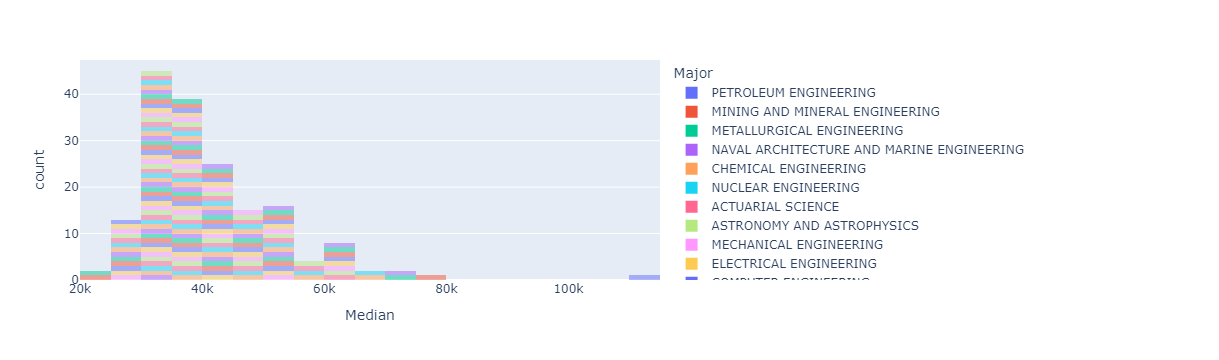

In [386]:
fig = px.histogram(DF_raw,
                   nbins=20,
                   x='Median',
                   color='Major',
                   opacity=0.5
                   )


fig.show()
Highest_Median = Stats.max()
show(Highest_Median)
#I just chose a high amount of nbins because there were many majors. As I kept increasing the number of bins meant the data got easier to read. Also the highest one 
#would have to be Petroleum engineering. USing Stat.Max gave us the highest median value and it is easy to find in the histogram.

**(Click Here to Explain your Results)**



* Are all STEM fields the same in terms job opportunities?
    * Assume the following are STEM major categories

  ``` ["Biology & Life Science", "Computers & Mathematics", "Engineering","Physical Sciences"]```
  
    * Create a DataFrame (using a mask) so you only look at STEM majors.
    * Which STEM majors have median salaries equal to or less than the median for all majors' median earnings?
* What types of majors do women tend to major in?
    * Create a scatterplot of median income vs. proportion of women in that major, coloured by whether the major is in a STEM field or not.

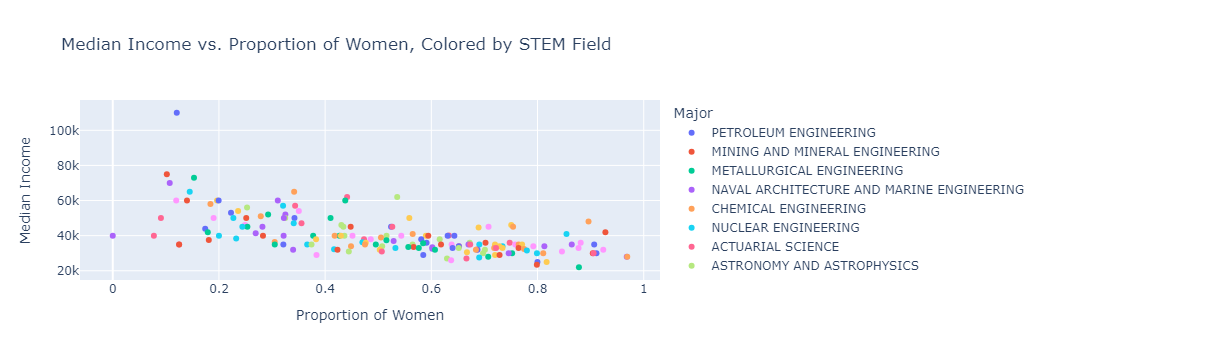

In [413]:


stem_mask = (DF_raw['Major'] == "Biology & Life Science") | (DF_raw['Major'] == "Computers & Mathematics") | (DF_raw['Major'] == "Engineering") | (DF_raw['Major'] == "Physical Sciences")

DF_stem = DF_raw[stem_mask]

median_income_stem = DF_stem['Median'].median()

Below_Median = DF_stem[DF_stem['Median'] <= median_income_stem]
show(Below_Median)

women_dominated_stem = DF_stem[DF_stem['ShareWomen'] > 0.5]
show(women_dominated_stem)
stem_condition = (DF_raw['Major'] == "Biology & Life Science") | (DF_raw['Major'] == "Computers & Mathematics") | (DF_raw['Major'] == "Engineering") | (DF_raw['Major'] == "Physical Sciences")

DF_raw['Is_STEM'] = stem_condition

fig = px.scatter(
    DF_raw, 
    x='ShareWomen', 
    y='Median', 
    color='Major',
    labels={'ShareWomen': 'Proportion of Women', 'Median': 'Median Income'},
    title='Median Income vs. Proportion of Women, Colored by STEM Field'
)

fig.show()




In [394]:
Are all STEM fields the same in terms job opportunities?
#Not all stem fields are the same in terms of job opprountites as some are more willing to employ than others or are in more demand.

Which STEM majors have median salaries equal to or less than the median for all majors' median earnings?

What types of majors do women tend to major in?

Create a scatterplot of median income vs. proportion of women in that major, coloured by whether the major is in a STEM field or not.

In [41]:
#

### 4. Ask a question of interest to you.

In [44]:
#How do different engine tyes or even fuels going with it impact efficency of an engine?

**(Click Here to Explain your Results)**